In [1]:
import sys
sys.path.append('../src')

from pkg_torchrl.env import make_env
from pkg_ddpg_td3.utils.map_eval import *

from configs import BaseConfig

In [2]:
config = BaseConfig()
env = make_env(config, generate_map=generate_eval_map152)

/home/tamino/dev/robot_learning/DRL-Traj-Planner/notebooks/../src/pkg_ddpg_td3/environment/environment.py:176: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return {"success": torch.tensor(self.reached_goal).unsqueeze(0),


In [3]:
_ = env.reset()

In [4]:
from pkg_ddpg_td3.environment import plot
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import os
folder_path = "../Model/cr_experiment/trajectories"
list_1 = []
list_2 = []

for filename in os.listdir(folder_path):
    if filename.startswith("1"):
        file_path = os.path.join(folder_path, filename)
        loaded_traj = np.loadtxt(file_path, delimiter=",")
        list_1.append(loaded_traj)
    elif filename.startswith("2"):
        file_path = os.path.join(folder_path, filename)
        loaded_traj = np.loadtxt(file_path, delimiter=",")
        list_2.append(loaded_traj)


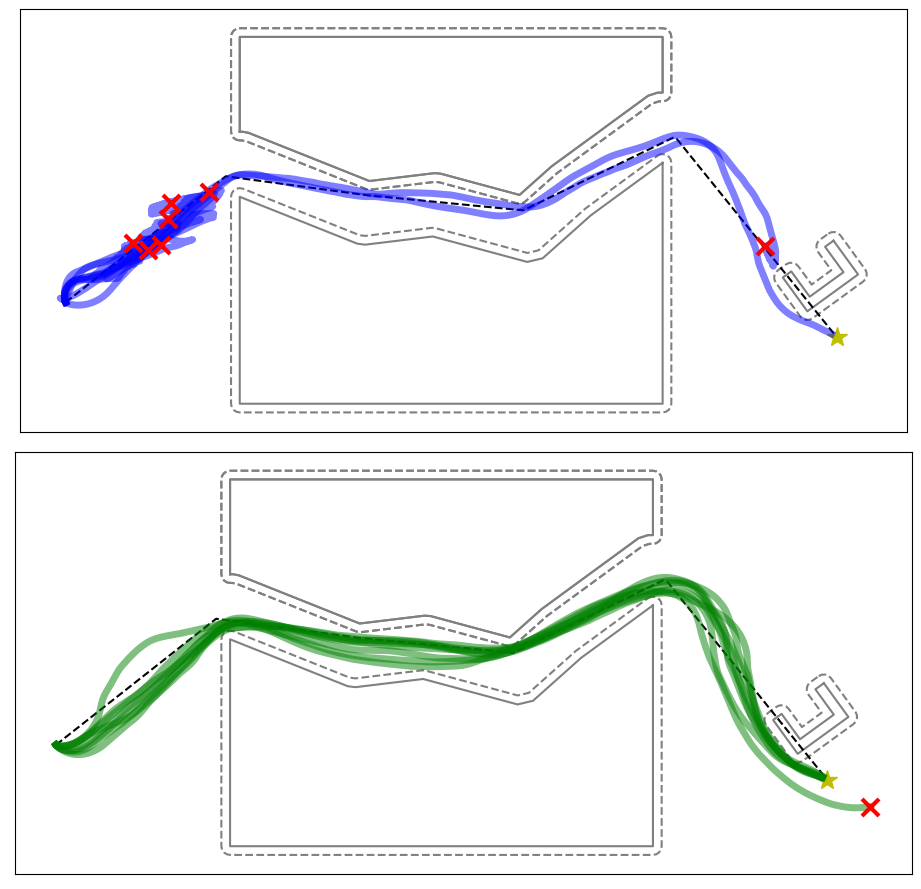

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(11, 9))        

for ax in axs:
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks([])
    ax.set_yticks([])
    plot.obstacles(ax, env.unwrapped.obstacles, fmt='gray')
    plot.obstacles(ax, env.unwrapped.obstacles, padded=True,
                   linestyle="--", label="Padded obstacles", fmt='gray')
    # plot.boundary(ax, env.unwrapped.boundary)
    plot.reference_path(ax, env.unwrapped.path)
    # plot.robot(ax, env.unwrapped.agent)
    # plot.line(ax, env.unwrapped.traversed_positions, "b") #, label="Past path")

for traj in list_1:
    plot.line(axs[0], traj, "b", alpha=0.5, linewidth=5)
    last_point = traj[-1]
    if not ((last_point[0]- 40) < .5 and (last_point[1] + 10) < .5):
        axs[0].scatter(last_point[0], last_point[1], marker='x',
                       color='r', s=150, linewidth=3, zorder=5)

for traj in list_2:
    plot.line(axs[1], traj, "g", alpha=0.5, linewidth=5)
    last_point = traj[-1]
    if not ((last_point[0]- 40) < .5 and (last_point[1] + 10) < .5):
        axs[1].scatter(last_point[0], last_point[1], marker='x',
                       color='r', s=150, linewidth=3, zorder=5)

plt.tight_layout()

# TODO do this for different starting points